# Shopee E-commerce Sales Analysis

### Project Overview
This project analyzes 20,000+ Shopee Malaysia product listings to identify sales patterns, 
customer behavior, and business insights.  
The analysis is done using **Python (pandas, seaborn, matplotlib)**, 
and the dataset is prepared for **Tableau / Power BI dashboards**.

## 1. Import Libraries & Load Dataset

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [63]:
data_path = "C:\\Users\\Yong1\\Documents\\20240121_shopee_sample_data.csv"
df = pd.read_csv(data_path)
df.head()

,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,price_actual,sitename,idHash,total_rating,id,total_sold,pict_link,favorite,timestamp,desc
0,25.8,"KL City, Kuala Lumpur",Shopee | Women's Bags | Shoulder Bags | Should...,Product Specifications Category Shopee Women's...,1081 PU SLING BAG KULIT leather Casual Beg Tan...,27/4/2023,https://shopee.com.my/1081-PU-SLING-BAG-KULIT-...,4.9,qqfwholesale,19ec9fdedd9fe3e14bc652950fc3c423,12.9,shopee,88f051f0a2dcf0d29191e0175b828938,179,88f051f0a2dcf0d29191e0175b828938,179,https://down-my.img.susercontent.com/file/my-1...,Favorite (128,1.682550e+12,🎉 WELCOME To QQF WHOLESALE \r\n😍 ALL item read...
1,8.5,"KL City, Kuala Lumpur",Shopee | Women's Bags | Handbags | Set Handbags,Product Specifications Category Shopee Women's...,N09 READY STOCK MYFOOYIN woman handbag set 2in...,26/4/2023,https://shopee.com.my/N09-READY-STOCK-MYFOOYIN...,4.9,fooyin88,7a36765d1e2ca2b6a5414ddfeedfefc3,8.5,shopee,ec6ce64f4b77efb38b6392818959f181,8.1k,ec6ce64f4b77efb38b6392818959f181,8.1k,https://down-my.img.susercontent.com/file/23da...,Favorite (21.5k,1.682470e+12,READY STOCK\nMEASUREMENT:\nLONG 26CM X HEIGHT ...
2,3999.0,"KL City, Kuala Lumpur",Shopee | Cameras & Drones | DSLR Cameras | DSLRs,Product Specifications Category Shopee Cameras...,Canon EOS 70D 18-55mm IS STM Original+64gb+ext...,26/4/2023,https://shopee.com.my/Canon-EOS-70D-18-55mm-IS...,5,xpro.gadget,55608f901f4c5384f884de18227d4298,2739.0,shopee,568c2029fed7d22973ff96d0404a8ff8,10,568c2029fed7d22973ff96d0404a8ff8,10,https://down-my.img.susercontent.com/file/4d3a...,Favorite (132,1.682470e+12,Canon 70D\nHighlights\nEF-S 18-55mm f/3.5-5.6 ...
3,19.0,"KL City, Kuala Lumpur",Shopee | Others | Fengshui & Religious Supplies,Product Specifications Category Shopee Others ...,贺加福 （新）九品莲花大悲咒/30.5cmX30.5cm/正背彩色/莲花纸/1包6色/1色2...,26/4/2023,https://shopee.com.my/%E8%B4%BA%E5%8A%A0%E7%A6...,5,hokarhock,160d66bd6367d2eb88c6cd8cbfa8de85,19.0,shopee,de28753a7ba4ec8b40b184a62da006fe,17,de28753a7ba4ec8b40b184a62da006fe,17,https://down-my.img.susercontent.com/file/my-1...,Favorite (11,1.682470e+12,贺加福\r\n（新）九品莲花大悲咒\r\n30.5cmX30.5cm\r\n一色20张， 一...
4,11.0,"KL City, Kuala Lumpur",Shopee | Men Clothes | Traditional Wear | Bottoms,Product Specifications Category Shopee Men Clo...,Fashion Men's Sheer Thong Low Rise Stretch G-S...,24/4/2023,https://shopee.com.my/Fashion-Men%27s-Sheer-Th...,5,mrbunny.my,f95121639c00abd31d1e49c33428d7ff,5.5,shopee,76a30294ff1350e6d26885efa3188d02,17,76a30294ff1350e6d26885efa3188d02,17,https://down-my.img.susercontent.com/file/7654...,Favorite (34,1.682290e+12,"Details:* Tag Size: L~2XL, Please make sure th..."


We start by importing the dataset and essential Python libraries.
Display first 5 rows and columns data details.


## 2. Data Cleaning

In [64]:
print("Missing values per column:")
print(df.isnull().sum())

# Remove duplicates 
df = df.drop_duplicates()

# Clean numeric columns (convert text -> number)
def clean_number(x):
    if pd.isna(x):
        return 0
    x = str(x).lower().replace(",", "")
    if 'k' in x:
        return float(re.sub(r'[^0-9\.]', '', x)) * 1000
    return float(re.sub(r'[^0-9\.]', '', x)) if re.search(r'\d', x) else 0

for col in ["total_sold", "favorite", "total_rating"]:
    df[col] = df[col].apply(clean_number).astype(int)

# Convert timestamp into datetime
df["date"] = pd.to_datetime(df["timestamp"], unit="ms")

# Handle missing categorical values
df["delivery"] = df["delivery"].fillna("Unknown")
df["item_category_detail"] = df["item_category_detail"].fillna("Unknown")

# Drop rows with critical missing values 
df = df.dropna(subset=["price_actual", "title"])

# Final check after cleaning
print("\nData shape after cleaning:", df.shape)
print("Remaining missing values:")
print(df.isnull().sum())

Missing values per column:
price_ori               0
delivery                0
item_category_detail    0
specification           0
title                   0
w_date                  0
link_ori                0
item_rating             0
seller_name             0
idElastic               0
price_actual            0
sitename                0
idHash                  0
total_rating            0
id                      0
total_sold              0
pict_link               0
favorite                0
timestamp               0
desc                    0
dtype: int64

Data shape after cleaning: (6289, 21)
Remaining missing values:
price_ori               0
delivery                0
item_category_detail    0
specification           0
title                   0
w_date                  0
link_ori                0
item_rating             0
seller_name             0
idElastic               0
price_actual            0
sitename                0
idHash                  0
total_rating            0
id         


- Checked missing values for all columns  
- Removed duplicate rows  
- Converted text-based numeric columns (e.g., "8.1k") into integers  
- Converted `timestamp` to datetime format  
- Filled missing values in categorical columns (`delivery`, `item_category_detail`) with "Unknown"  
- Dropped rows with missing critical values (`price_actual`, `title`)  
- Re-checked dataset to confirm no missing values remain  

## 3. Exploratory Data Analysis

### (A) Top 10 Products by Sales

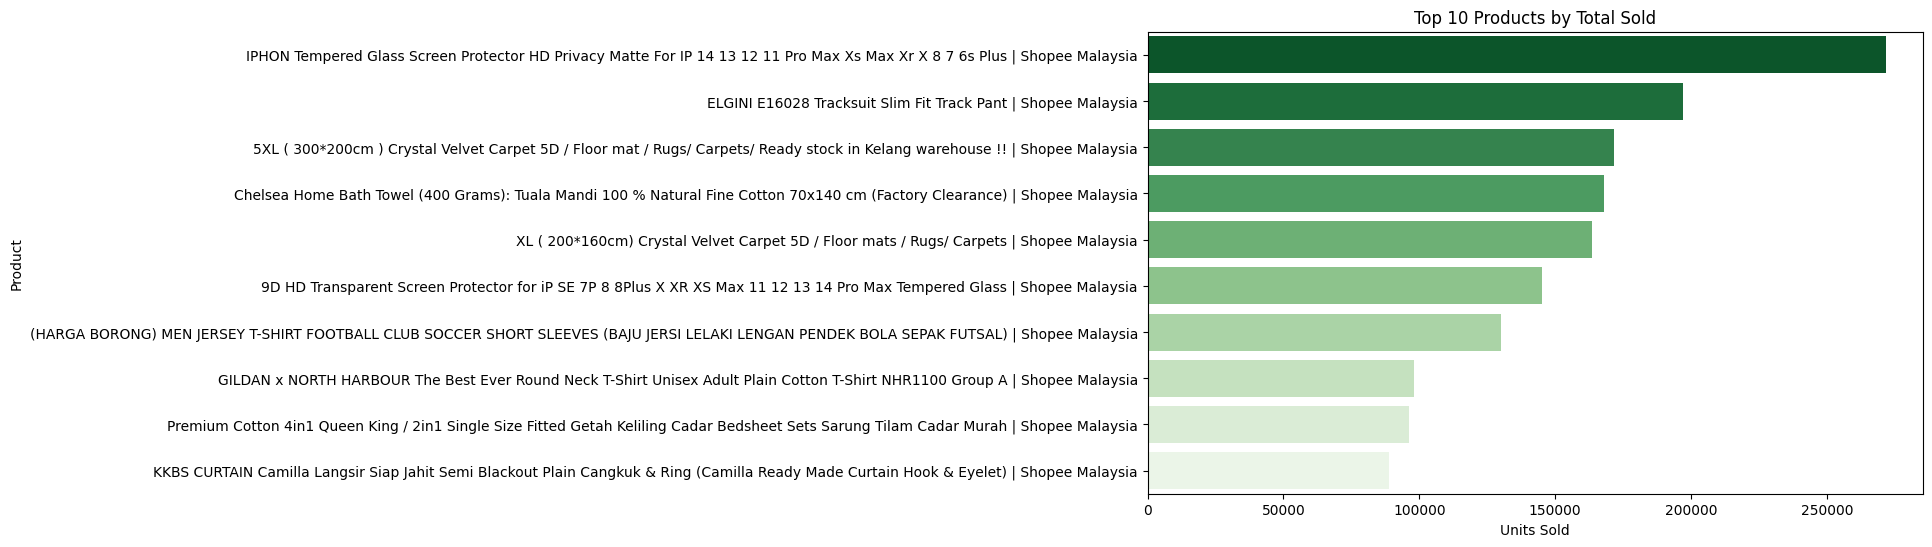

In [65]:
top_products = df.groupby("title")["total_sold"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="Greens_r", legend=False)
plt.title("Top 10 Products by Total Sold")
plt.xlabel("Units Sold")
plt.ylabel("Product")
plt.show()

We identify the products with the highest total units sold.

### (B) Rating vs Sales

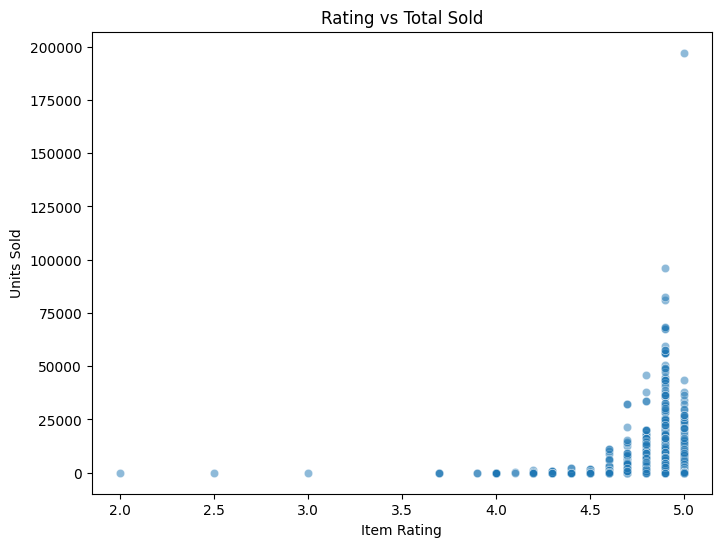

In [66]:
plt.figure(figsize=(8,6))
item_rating_numeric = pd.to_numeric(df["item_rating"], errors="coerce")
sns.scatterplot(x=item_rating_numeric, y=df["total_sold"], alpha=0.5)
plt.title("Rating vs Total Sold")
plt.xlabel("Item Rating")
plt.ylabel("Units Sold")
plt.show()

### (C) Regional Sales

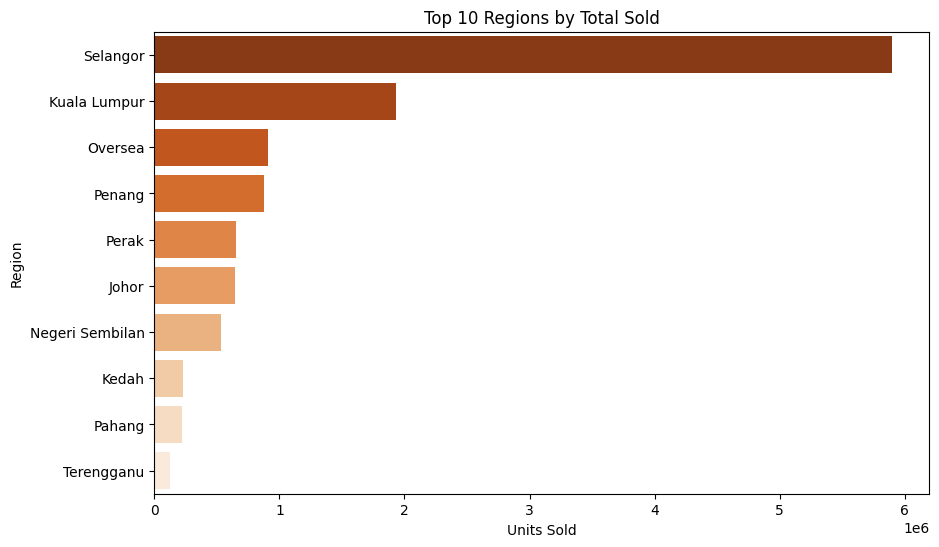

Top 10 Regions by Sales:
 region
Selangor           5899721
Kuala Lumpur       1928559
Oversea             912825
Penang              875665
Perak               655286
Johor               644318
Negeri Sembilan     532257
Kedah               232102
Pahang              221569
Terengganu          129057
Name: total_sold, dtype: int64


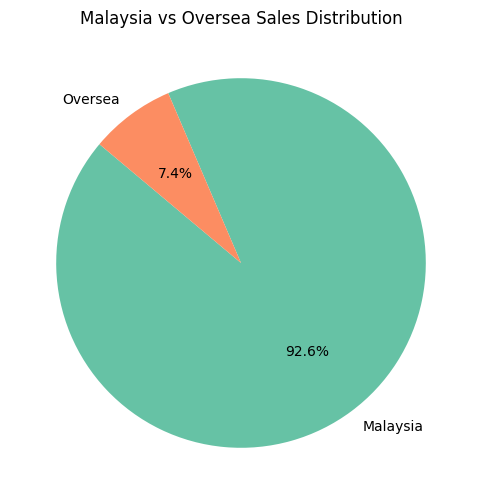

Malaysia vs Oversea Sales:
 region_type
Malaysia    11348039
Oversea       912825
Name: total_sold, dtype: int64


In [67]:
  
# Define Malaysia states
malaysia_states = [
    "Johor", "Kedah", "Kelantan", "Melaka", "Negeri Sembilan",
    "Pahang", "Penang", "Perak", "Perlis", "Sabah", "Sarawak",
    "Selangor", "Terengganu", "Kuala Lumpur", "Labuan", "Putrajaya"
]

# Extract region from 'specification' field
def extract_region(spec):
    if pd.isna(spec):
        return "Unknown"
    for state in malaysia_states:
        if state.lower() in str(spec).lower():
            return state
    return "Oversea"

df["region"] = df["specification"].apply(extract_region)

# ---- Top 10 Regions by Sales ----
region_sales = df.groupby("region")["total_sold"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.values, y=region_sales.index, hue=region_sales.index, palette="Oranges_r", legend=False)
plt.title("Top 10 Regions by Total Sold")
plt.xlabel("Units Sold")
plt.ylabel("Region")
plt.show()

print("Top 10 Regions by Sales:\n", region_sales)

# ---- Malaysia vs Oversea Sales ----
df["region_type"] = df["region"].apply(lambda x: "Malaysia" if x in malaysia_states else "Oversea")

region_type_sales = df.groupby("region_type")["total_sold"].sum()

plt.figure(figsize=(6,6))
plt.pie(region_type_sales.values, labels=region_type_sales.index, autopct="%.1f%%", startangle=140, colors=["#66c2a5","#fc8d62"])
plt.title("Malaysia vs Oversea Sales Distribution")
plt.show()

print("Malaysia vs Oversea Sales:\n", region_type_sales)

Based on our analysis, the sales volume is heavily concentrated within the Malaysian domestic market.

| Category | Total Units Sold |
| :--- | :--- |
| **Malaysia** | **11,348,039** |
| **Oversea** | **912,825** |

The data reveals that domestic sales in Malaysia account for the vast majority of units sold, significantly outperforming cross-border e-commerce.


### **Top-Performing Malaysian Regions**
A closer examination of regional performance identifies which areas are driving domestic sales.

| Region | Total Units Sold |
| :--- | :--- |
| **Selangor** | **5,899,721** |
| **Kuala Lumpur** | **1,928,559** |
| Penang | 875,665 |
| Perak | 655,286 |
| Johor | 644,318 |
| Negeri Sembilan | 532,257 |
| Kedah | 232,102 |
| Pahang | 221,569 |
| Terengganu | 129,057 |
| _Oversea_ | _912,825_ |

This table clearly shows that **Selangor** and **Kuala Lumpur** are the dominant markets, generating a combined total of over 7.8 million units sold.


### **Strategic Insights**

* **Focus on Key Markets:** The data strongly suggests that **Selangor** and **Kuala Lumpur** are the most vital regions for the business. Resources for marketing and logistics should be strategically focused on these areas to maximize sales.
* **Cross-Border Opportunity:** While currently a smaller percentage of total sales, the **Oversea** category still represents a significant volume. This could be an important area for future growth and expansion, but the current strength lies in the domestic market.
* **Regional Prioritization:** After the top two regions, areas like **Penang**, **Perak**, and **Johor** show promising sales, indicating they are also key markets to consider for targeted campaigns and optimization.


## (D) Price Range Distribution

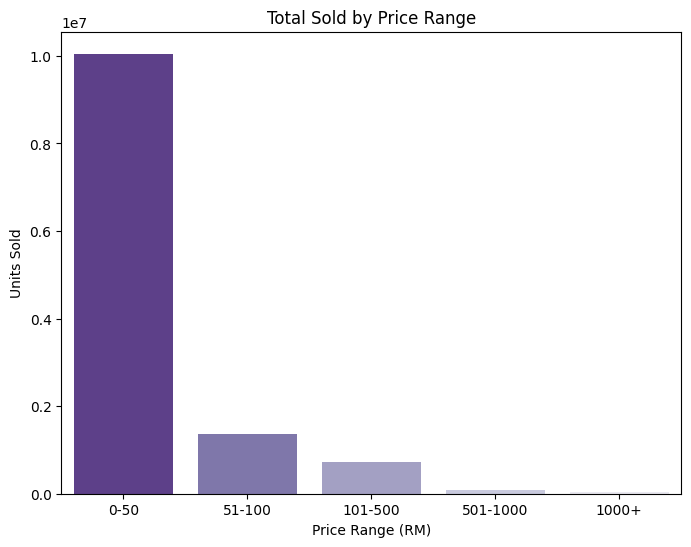


Price Range Sales:
 price_range
0-50        10049276
51-100       1368507
101-500       724998
501-1000       82510
1000+          35573
Name: total_sold, dtype: int64


In [68]:
bins = [0, 50, 100, 500, 1000, df["price_actual"].max()]
labels = ["0-50", "51-100", "101-500", "501-1000", "1000+"]

df["price_range"] = pd.cut(df["price_actual"], bins=bins, labels=labels, include_lowest=True)

price_sales = df.groupby("price_range", observed=False)["total_sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=price_sales.index, y=price_sales.values, hue=price_sales.index, palette="Purples_r", legend=False)
plt.title("Total Sold by Price Range")
plt.xlabel("Price Range (RM)")
plt.ylabel("Units Sold")
plt.show()

print("\nPrice Range Sales:\n", price_sales)


Sales distribution across different price ranges.

## (E) Monthly Sales Trend

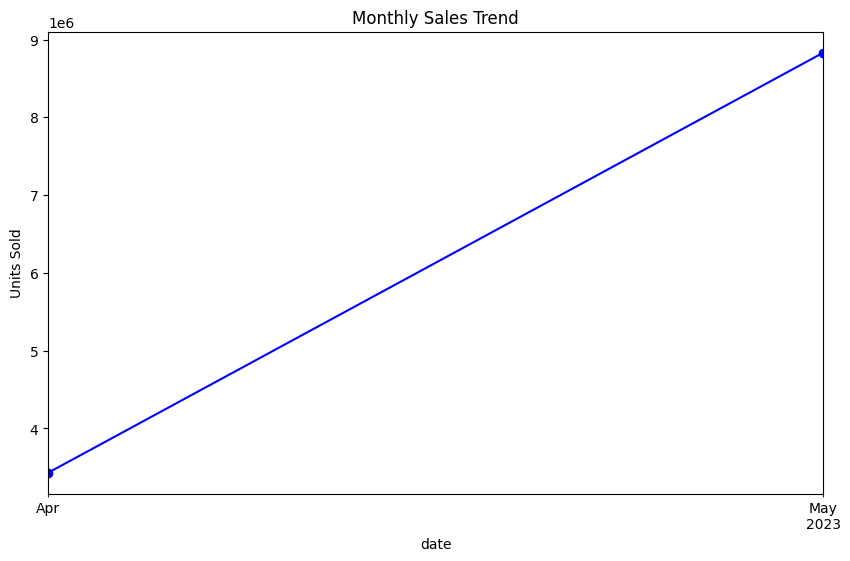


Monthly Sales Trend:
 date
2023-04    3430349
2023-05    8830515
Freq: M, Name: total_sold, dtype: int64


In [69]:
monthly_sales = df.groupby(df["date"].dt.to_period("M"))["total_sold"].sum()

monthly_sales.plot(kind="line", marker="o", figsize=(10,6), title="Monthly Sales Trend", color="blue")
plt.ylabel("Units Sold")
plt.show()

print("\nMonthly Sales Trend:\n", monthly_sales)

Line chart showing changes in sales over time.

## 4. Key Insights

- The top products are mostly affordable items **(<RM50)** with high sales volume.
- Higher ratings do not strongly correlate with sales (brand & price matter more).
- Most sales come from **Selangor, KL, and Penang**, with significant contribution from Oversea sellers.
- The most popular price segment is **RM0 – 50**, showing that Shopee is driven by budget-friendly products.
- Sales show monthly fluctuations, with seasonal spikes.
- Malaysia contributes the majority of sales, but Oversea sellers also play a strong role.

## 5. Conclusion

This project demonstrates:
- **Data cleaning (missing values, duplicates, type conversion)**
- **Exploratory Data Analysis with Pandas, Matplotlib, Seaborn**
- **Business insights (regional distribution, product categories, sales trends)**